# 0) Imports

In [3]:
# install the main library YFinance
!pip install yfinance

  Using cached yfinance-0.2.61-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached curl_cffi-0.11.1-cp39-abi3-win_amd64.whl.metadata (15 kB)
Using cached yfinance-0.2.61-py2.py3-none-any.whl (117 kB)
Using cached curl_cffi-0.11.1-cp39-abi3-win_amd64.whl (1.4 MB)

   ---------------------------------------- 0/2 [curl_cffi]
   ---------------------------------------- 0/2 [curl_cffi]
   ---------------------------------------- 0/2 [curl_cffi]
   -------------------- ------------------- 1/2 [yfinance]
   -------------------- ------------------- 1/2 [yfinance]
   -------------------- ------------------- 1/2 [yfinance]
   -------------------- ------------------- 1/2 [yfinance]
   -------------------- ------------------- 1/2 [yfinance]
   -------------------- ------------------- 1/2 [yfinance]
   -------------------- ------------------- 1/2 [yfinance]
   -------------------- ------------------- 1/2 [yfinance]
   -------------------- ------------------- 1/2 [yfinance]
   --------------------

In [5]:
!pip install pandas_datareader

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.8 MB 1.7 MB/s eta 0:00:02
   -------- ------------------------------- 0.8/3.8 MB 1.7 MB/s eta 0:00:02
   ----------- ---------------------------- 1.0/3.8 MB 1.6 MB/s eta 0:00:02
   ---------------- ----------------------- 1.6/3.8 MB 1.6 MB/s eta 0:00:02
   ------------------- -------------------- 1.8/3.8 MB 1.6 MB/s eta 0:00:02
   ---------------------- ----------------- 2.1/3.8 MB 1.6 MB/s eta 0:00:02
   ------------------------ --------------- 2.4/3.8 MB 1.6 MB/s eta 0:00:01
   --------------------------- ------------ 2.6/3.8 MB 1.6 MB/s eta 0:00:01
   --------------------------------- ------ 3.1/3.8 MB 1.6 MB/s eta 0:00:01
   ----------------------------------- ---- 3.4/3.8 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 1.6 MB/s eta 0:00:00

   ----------------------

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


# 1) Understanding Data-Driven Decisions data pulls

In [3]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2025; month= 6; day=3
Period for indexes: 1955-06-03 to 2025-06-03 


## 1.1) GDP

Indica que los datos provienen de la base de datos FRED (Federal Reserve Economic Data), que es una fuente confiable para indicadores económicos.

Parámetros de DataReader

"GDPPOT": símbolo o código del conjunto de datos que se desea obtener, en este caso el Producto Interno Bruto Potencial Real.

"fred": especifica que la fuente de datos es FRED (Federal Reserve Bank of St. Louis).

start=start: fecha desde la cual se desea obtener los datos. Esta variable start fue definida en el código anterior como la fecha hace 70 años desde hoy (mismo mes y día).

In [3]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

1. `gdppot.GDPPOT / gdppot.GDPPOT.shift(4) - 1`  
- Esta operación calcula la tasa de crecimiento interanual (Year-Over-Year, **YoY**) del PIB potencial real:

$$
\text{Crecimiento YoY} = \frac{\text{Valor Actual}}{\text{Valor hace 4 trimestres}} - 1
$$

- El resultado es un porcentaje (en formato decimal) que representa cuánto ha crecido o decrecido el PIB potencial en comparación con el mismo trimestre del año anterior.

2. `gdppot.GDPPOT / gdppot.GDPPOT.shift(1) - 1`  
- Calcula la tasa de crecimiento trimestral (Quarter-over-Quarter, **QoQ**) del PIB potencial real:

$$
\text{Crecimiento QoQ} = \frac{\text{Valor Actual}}{\text{Valor del trimestre anterior}} - 1
$$



In [4]:
#Crecimiento anual (YoY) comparando con el mismo trimestre del año anterior.
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
#Crecimiento trimestral (QoQ) comparando con el trimestre inmediatamente anterior.
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail(15)

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2021-10-01,21606.08076,0.020390,0.005260
2022-01-01,21722.02480,0.020882,0.005366
2022-04-01,21840.56636,0.021403,0.005457
2022-07-01,21961.53508,0.021799,0.005539
2022-10-01,22084.92536,0.022162,0.005618
2023-01-01,22208.24254,0.022384,0.005584
2023-04-01,22333.11239,0.022552,0.005623
2023-07-01,22459.74068,0.022685,0.005670
2023-10-01,22588.18459,0.022787,0.005719


Desglose técnico de funciones y métodos:
* plt.subplots(figsize=(20, 6)): Crea una figura (fig) y un eje (ax) con dimensiones personalizadas en pulgadas para visualización amplia y clara.

* ax.fill_between(x, y, ...): Dibuja un área coloreada entre el eje X y la curva definida por y para enfatizar el volumen o magnitud del PIB potencial.

* ax.twinx(): Crea un eje Y secundario que comparte el mismo eje X, útil para comparar dos variables con unidades diferentes (en este caso, PIB en dólares y crecimiento en porcentaje).

* mtick.PercentFormatter(1.0): Formatea los valores numéricos del eje Y secundario como porcentajes. El parámetro 1.0 indica que el valor 1 equivale a 100%.

* ax.plot() y ax2.plot(): Dibuja líneas para los datos. En el segundo eje se añaden marcadores para destacar puntos trimestrales.

* Leyenda combinada: Se obtienen las líneas y etiquetas de ambos ejes para generar una leyenda única, mejorando la interpretación.

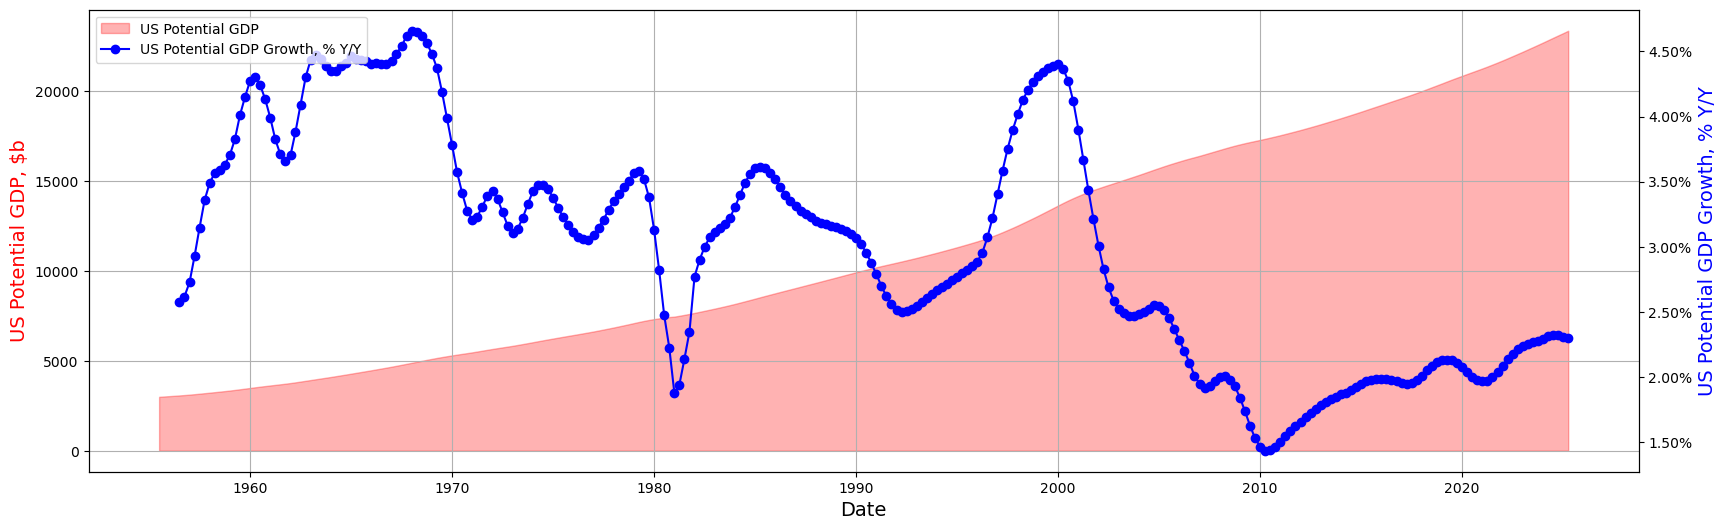

In [8]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))  # Crea la figura y un eje principal con tamaño ancho=20, alto=6 pulgadas
plt.grid(True)                           # Activa la cuadrícula de fondo para facilitar lectura

# Graficar el área bajo la curva del PIB potencial de EE.UU. (en miles de millones de dólares)
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Crear un eje Y secundario para la tasa de crecimiento del PIB en porcentaje
ax2 = ax.twinx()  # Genera un segundo eje Y que comparte el eje X con 'ax'
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Formatea el eje Y secundario para mostrar porcentajes (0.0 a 1.0 → 0% a 100%)
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")  # Grafica la tasa de crecimiento anual con marcadores

# Configurar etiquetas de los ejes y título
ax.set_xlabel("Date", fontsize=14)                            # Etiqueta para eje X (fecha)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)       # Etiqueta eje Y principal (PIB potencial en miles de millones USD)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)  # Etiqueta eje Y secundario (crecimiento % YoY)

# Añadir leyenda combinada para ambos gráficos (PIB y tasa de crecimiento)
lines, labels = ax.get_legend_handles_labels()    # Obtiene líneas y etiquetas del eje principal
lines2, labels2 = ax2.get_legend_handles_labels() # Obtiene líneas y etiquetas del eje secundario
ax2.legend(lines + lines2, labels + labels2, loc='upper left')  # Coloca leyenda combinada en la esquina superior izquierda

plt.show()  # Muestra la gráfica en pantalla


## 1.2) Inflation - CPI Core

In [9]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)

In [10]:
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(13)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2024-04-01,317.596,0.036236,0.002633
2024-05-01,318.053,0.033905,0.001439
2024-06-01,318.343,0.032606,0.000912
2024-07-01,318.933,0.032283,0.001853
2024-08-01,319.839,0.032918,0.002841
2024-09-01,320.835,0.032899,0.003114
2024-10-01,321.688,0.032928,0.002659
2024-11-01,322.619,0.032801,0.002894
2024-12-01,323.296,0.032136,0.002098


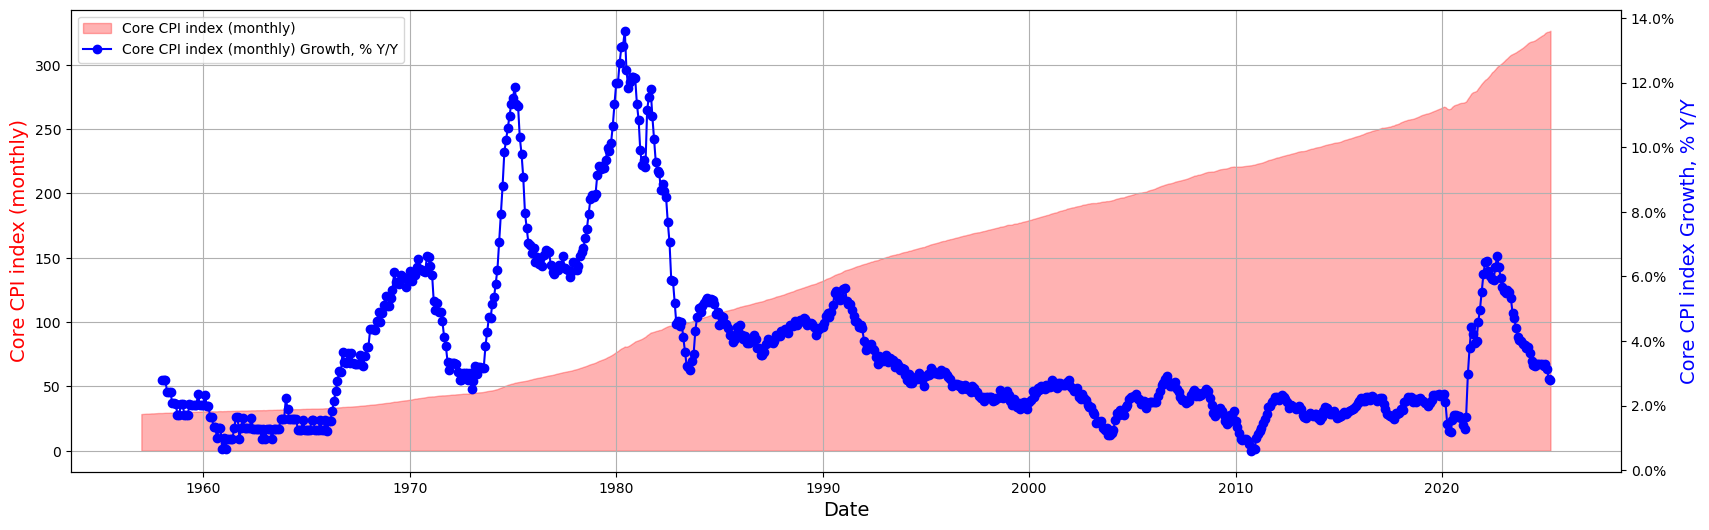

In [11]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 1.3 Interest rates

In [12]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(10)

,FEDFUNDS
DATE,
2024-08-01,5.33
2024-09-01,5.13
2024-10-01,4.83
2024-11-01,4.64
2024-12-01,4.48
2025-01-01,4.33
2025-02-01,4.33
2025-03-01,4.33
2025-04-01,4.33


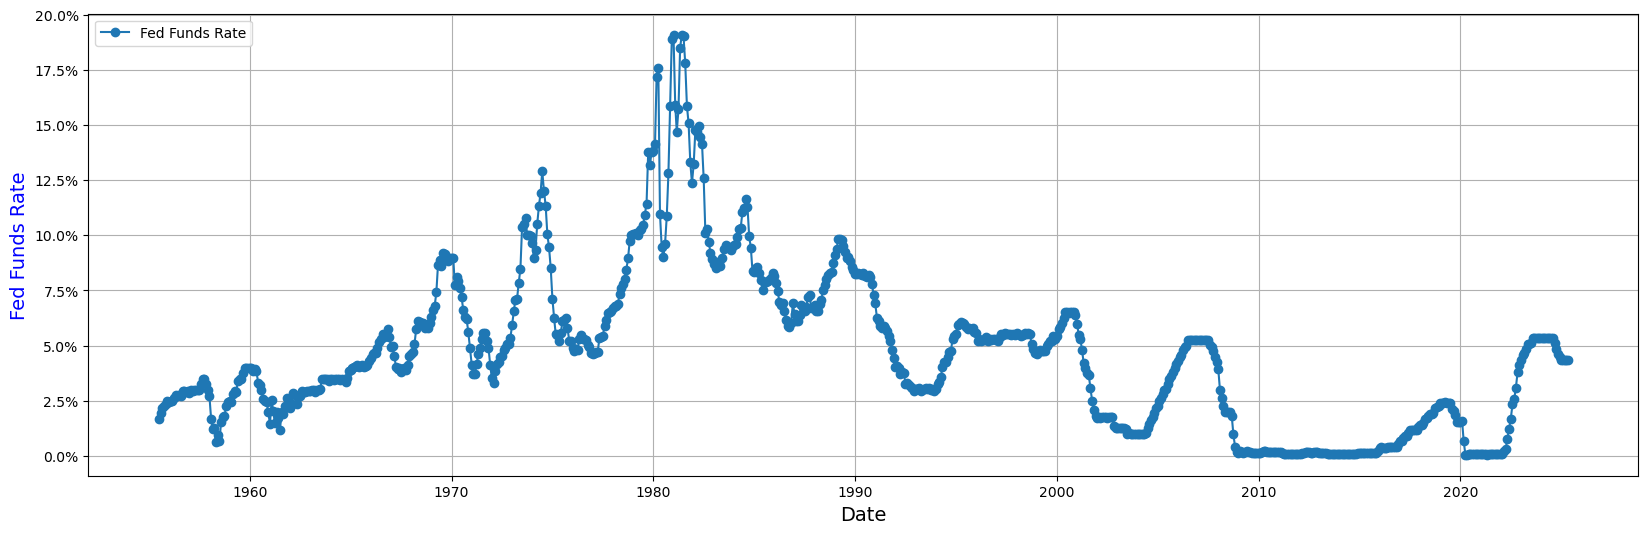

In [13]:
# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

"DGS1" es el código que representa el rendimiento (tasa de interés) de los bonos del Tesoro de EE.UU. a 1 año (1-Year Treasury Constant Maturity Rate).

In [14]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail()

,DGS1
DATE,
2025-05-26,NaN
2025-05-27,4.14
2025-05-28,4.16
2025-05-29,4.13
2025-05-30,4.11


Other rates for US Treasury: https://fred.stlouisfed.org/categories/115  
* https://fred.stlouisfed.org/series/DGS2
* https://fred.stlouisfed.org/series/DGS3
* https://fred.stlouisfed.org/series/DGS5
* https://fred.stlouisfed.org/series/DGS10
...

In [15]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

,DGS5
DATE,
2025-05-26,NaN
2025-05-27,4.04
2025-05-28,4.05
2025-05-29,4.00
2025-05-30,3.96


## 1.4 SNP500

**pdr.get_data_stooq()**

Es una función de la librería pandas_datareader que obtiene datos históricos financieros desde la fuente Stooq (un proveedor gratuito de datos bursátiles).

Stooq ofrece información de índices bursátiles, acciones, divisas, etc.



In [16]:
# Other indexes: https://stooq.com/t/

# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-06-02,5896.68,5937.40,5861.43,5935.94,2.762584e+09
2025-05-30,5903.67,5922.14,5843.66,5911.69,4.815798e+09
2025-05-29,5939.96,5943.13,5873.80,5912.17,2.860741e+09
2025-05-28,5925.54,5939.92,5881.88,5888.55,2.671436e+09
2025-05-27,5854.07,5924.33,5854.07,5921.54,2.908887e+09


### **Contexto**

* Se asume que el índice bursátil spx_index está ordenado en orden inverso, es decir, con la fecha más reciente en la primera fila y las más antiguas hacia abajo.

* En finanzas, típicamente se considera que un año bursátil tiene aproximadamente 252 días de negociación (excluyendo fines de semana y festivos).

### **shift(-n) con desplazamiento negativo**

* El método .shift(-n) desplaza la columna hacia arriba n filas, es decir, toma valores futuros en relación a la fila actual (por eso "REVERSE ORDER OF THE DATA" es importante).

* Esto significa que para cada fila, se compara el valor actual con el valor que está n filas adelante (que en orden inverso corresponde a n días atrás en tiempo).

# Cálculos de retornos o variaciones porcentuales

---

### spx_dod (Day-over-Day):

La fórmula para el retorno diario es:

$$
\text{spx\_dod} = \frac{\text{Close}_{\text{actual}}}{\text{Close}_{\text{día siguiente}}} - 1
$$

- Calcula el retorno diario comparando el precio de cierre actual con el precio de cierre del día siguiente (en el tiempo normal).
- La razón del desplazamiento negativo en el código es porque los datos están en **orden inverso** (fecha más reciente primero).

---

### spx_qoq (Quarter-over-Quarter):

La fórmula para el retorno trimestral es:

$$
\text{spx\_qoq} = \frac{\text{Close}_{\text{actual}}}{\text{Close}_{63\ \text{días adelante}}} - 1
$$

- Aproximadamente 63 días de negociación equivalen a un trimestre (3 meses).
- Mide el cambio porcentual del índice respecto a un trimestre atrás.

---

### spx_yoy (Year-over-Year):

La fórmula para el retorno anual es:

$$
\text{spx\_yoy} = \frac{\text{Close}_{\text{actual}}}{\text{Close}_{252\ \text{días adelante}}} - 1
$$

- Considera el cambio porcentual en un año completo de negociación (252 días).
- Muestra el crecimiento o caída anual del índice.


In [17]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
spx_index['spx_dod'] = (spx_index.Close/spx_index.Close.shift(-1)-1)
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)

In [19]:
spx_index.tail()

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
1955-06-08,39.22,39.22,39.22,39.22,1833333.0,-0.018519,NaN,NaN
1955-06-07,39.96,39.96,39.96,39.96,1794444.0,0.006803,NaN,NaN
1955-06-06,39.69,39.69,39.69,39.69,1422222.0,0.034402,NaN,NaN
1955-06-03,38.37,38.37,38.37,38.37,1438889.0,0.009471,NaN,NaN
1955-06-02,38.01,38.01,38.01,38.01,1450000.0,NaN,NaN,NaN


In [18]:
spx_index.head()

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2025-06-02,5896.68,5937.40,5861.43,5935.94,2.762584e+09,0.004102,0.014739,0.127017
2025-05-30,5903.67,5922.14,5843.66,5911.69,4.815798e+09,-0.000081,-0.007190,0.114144
2025-05-29,5939.96,5943.13,5873.80,5912.17,2.860741e+09,0.004011,0.008632,0.114511
2025-05-28,5925.54,5939.92,5881.88,5888.55,2.671436e+09,-0.005571,-0.011335,0.117830
2025-05-27,5854.07,5924.33,5854.07,5921.54,2.908887e+09,0.020459,-0.005661,0.115796


In [20]:
spx_truncated = spx_index[spx_index.index>='1990-01-01']

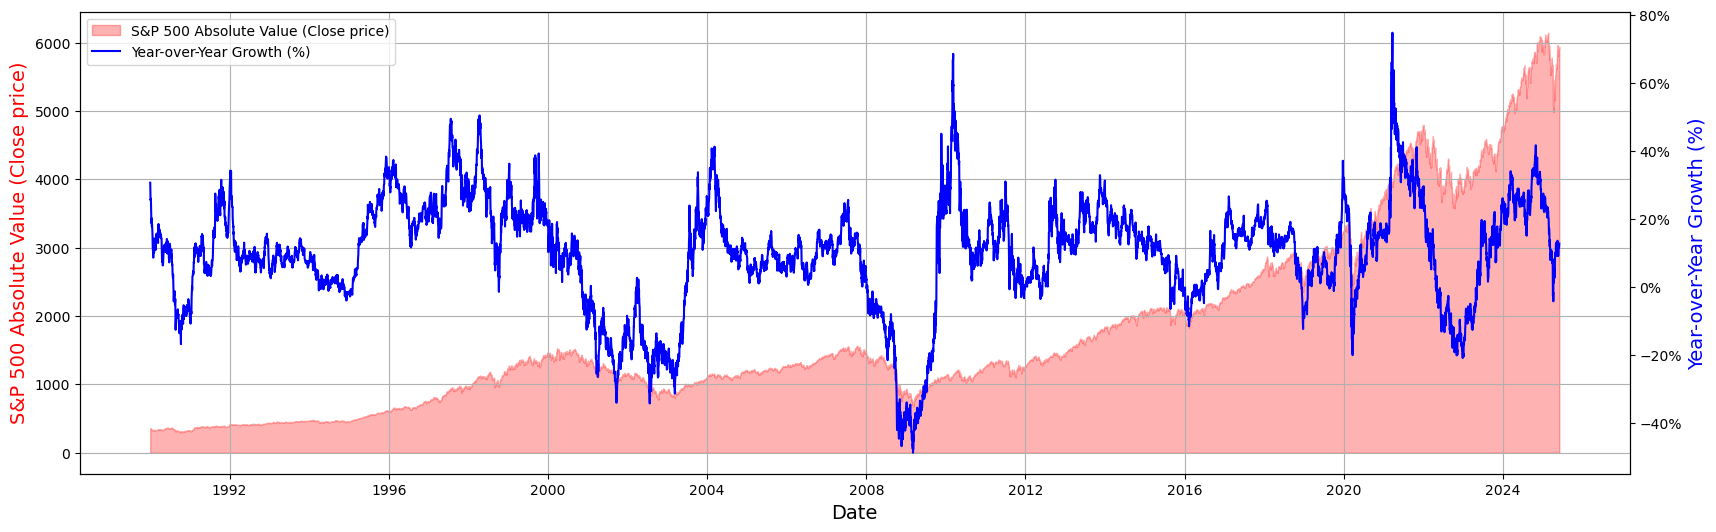

In [21]:
# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(20, 6))  # Crear figura y eje principal con tamaño amplio para mejor visualización
plt.grid(True)  # Activar la cuadrícula para facilitar la lectura de la gráfica

# Graficar área bajo la curva del precio de cierre absoluto del S&P 500
ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Crear un eje Y secundario para el crecimiento porcentual anual del índice
ax2 = ax.twinx()  # Compartir el eje X, crear un segundo eje Y para mostrar otra variable
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Formatear eje Y secundario para mostrar porcentajes (1.0 → 100%)
ax2.plot(spx_truncated.spx_yoy,
         color="blue",
         # marker=".",  # Opcional: marcador para puntos individuales
         label="Year-over-Year Growth (%)")

# Configurar etiquetas de los ejes y tamaño de fuente
ax.set_xlabel("Date", fontsize=14)  # Etiqueta eje X: fechas
ax.set_ylabel("S&P 500 Absolute Value (Close price)", color="red", fontsize=14)  # Etiqueta eje Y principal (valor absoluto del cierre)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)  # Etiqueta eje Y secundario (crecimiento YoY en porcentaje)

# Obtener y combinar las leyendas de ambos ejes para mostrar una única leyenda
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')  # Ubicación: esquina superior izquierda

plt.show()  # Mostrar la gráfica en pantalla


# 2) Data Sources for Stocks

## 2.1 OHLCV data daily - INDEXES

* yf.Ticker("^GDAXI"): crea un objeto de la clase Ticker de yfinance para el símbolo ^GDAXI (DAX index). Este objeto proporciona acceso a diferentes métodos y propiedades asociadas con el índice, como los precios históricos, la información actual, los dividendos, etc.

* ticker_obj.history(start = start): utiliza el método .history() del objeto Ticker para obtener los datos históricos.

* start = start: indica la fecha de inicio desde la cual se quiere obtener los datos históricos. La variable start debe estar definida previamente (por ejemplo, 70 años atrás desde la fecha actual).

* history() descarga los datos de precios históricos, como el precio de apertura, el precio de cierre, el precio máximo, el precio mínimo, el volumen negociado, y el precio de cierre ajustado (Adj Close), que es útil para reflejar los movimientos de precios ajustados por dividendos y splits.

In [4]:
# INDEXES from Yahoo Finance
# DAX index (XETRA - XETRA Delayed Price. Currency in EUR)
# WEB: https://finance.yahoo.com/quote/%5EGDAXI
# Option 1: dax_daily = yf.download(tickers = ["^GDAXI"],
#                      period = "max",
#                      interval = "1d")

# Option 2 (preferred):
# Download data with Adj Close for more accurate price reflections
ticker_obj = yf.Ticker("^GDAXI")
dax_daily = ticker_obj.history(start = start)

In [5]:
dax_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-28 00:00:00+02:00,24250.990234,24325.970703,24038.189453,24038.189453,57894000,0.0,0.0
2025-05-29 00:00:00+02:00,24255.009766,24255.009766,23917.060547,23933.230469,42765200,0.0,0.0
2025-05-30 00:00:00+02:00,23963.490234,24181.529297,23958.429688,23997.480469,110527000,0.0,0.0
2025-06-02 00:00:00+02:00,23865.380859,23993.220703,23740.089844,23930.669922,53147300,0.0,0.0
2025-06-03 00:00:00+02:00,24031.960938,24101.550781,23826.390625,24091.619141,50506800,0.0,0.0


# Cálculo del Crecimiento Interanual (YoY) del Índice DAX

La columna `dax_daily['Close']` contiene los precios de cierre actuales del índice DAX.

La columna `dax_daily['adj_close_last_year']` contiene el precio de cierre de hace un año (252 días de negociación).

La operación `dax_daily['Close'] / dax_daily['adj_close_last_year']` calcula la relación entre el precio de cierre actual y el precio de cierre del mismo día del año pasado (252 días de negociación atrás).  
Esto nos da el factor de crecimiento, es decir, cuánto ha cambiado el precio de un año a otro en términos relativos.

Finalmente, restamos 1 para convertir la relación en un porcentaje de cambio, obteniendo el **crecimiento interanual (YoY)**:

$$
\text{Crecimiento YoY} = \frac{\text{Precio de Cierre Actual}}{\text{Precio de Cierre Hace un Año}} - 1
$$

El resultado será el **crecimiento porcentual interanual** del índice DAX, donde un valor positivo indica que el índice ha crecido y un valor negativo indica que ha decrecido.

In [6]:
# normally 252 trading days
dax_daily['adj_close_last_year'] = dax_daily['Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Close'] / dax_daily['adj_close_last_year'] -1

In [7]:
dax_daily

,Open,High,Low,Close,Volume,Dividends,Stock Splits,adj_close_last_year,yoy_growth
Date,,,,,,,,,
1987-12-30 00:00:00+01:00,1005.190002,1005.190002,1005.190002,1005.190002,0,0.0,0.0,NaN,NaN
1988-01-04 00:00:00+01:00,956.489990,956.489990,956.489990,956.489990,0,0.0,0.0,NaN,NaN
1988-01-05 00:00:00+01:00,996.099976,996.099976,996.099976,996.099976,0,0.0,0.0,NaN,NaN
1988-01-06 00:00:00+01:00,1006.010010,1006.010010,1006.010010,1006.010010,0,0.0,0.0,NaN,NaN
1988-01-07 00:00:00+01:00,1014.469971,1014.469971,1014.469971,1014.469971,0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-05-28 00:00:00+02:00,24250.990234,24325.970703,24038.189453,24038.189453,57894000,0.0,0.0,18473.289062,0.301240
2025-05-29 00:00:00+02:00,24255.009766,24255.009766,23917.060547,23933.230469,42765200,0.0,0.0,18496.789062,0.293913
2025-05-30 00:00:00+02:00,23963.490234,24181.529297,23958.429688,23997.480469,110527000,0.0,0.0,18497.939453,0.297306


<Axes: xlabel='Date'>

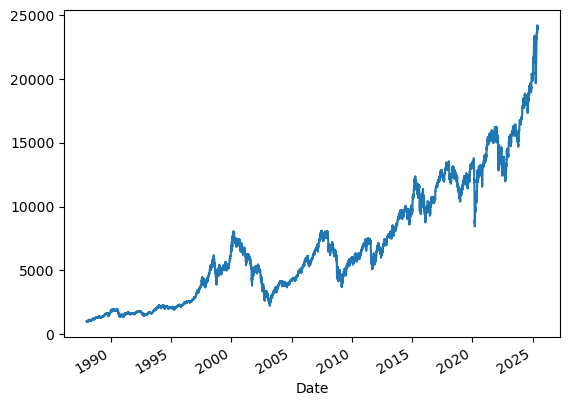

In [8]:
dax_daily['Close'].plot.line()

In [9]:
# delayed 15 min : https://finance.yahoo.com/quote/%5ESPX/
# S&P 500 INDEX : Chicago Options - Chicago Options Delayed Price. Currency in USD
ticker_obj = yf.Ticker("^SPX")
snp500_daily = ticker_obj.history(start = start, interval = "1d")

# old version:
# snp500_daily = yf.download(tickers = "^SPX",
#                      period = "max",
#                      interval = "1d")

In [10]:
snp500_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-28 00:00:00-04:00,5925.540039,5939.919922,5881.879883,5888.549805,4665050000,0.0,0.0
2025-05-29 00:00:00-04:00,5939.959961,5943.129883,5873.799805,5912.169922,4569750000,0.0,0.0
2025-05-30 00:00:00-04:00,5903.669922,5922.140137,5843.660156,5911.689941,6378540000,0.0,0.0
2025-06-02 00:00:00-04:00,5896.680176,5937.399902,5861.430176,5935.939941,4832240000,0.0,0.0
2025-06-03 00:00:00-04:00,5938.560059,5981.350098,5929.000000,5970.370117,5026680000,0.0,0.0


In [11]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
# https://www.investopedia.com/insights/introduction-to-stock-market-indices/

ticker_obj = yf.Ticker("^GSPC")
snp500_daily_non_delayed = ticker_obj.history(start = start, interval = "1d")

# old version:
# snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
#                      period = "max",
#                      interval = "1d")

In [12]:
snp500_daily_non_delayed.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-28 00:00:00-04:00,5925.540039,5939.919922,5881.879883,5888.549805,4665050000,0.0,0.0
2025-05-29 00:00:00-04:00,5939.959961,5943.129883,5873.799805,5912.169922,4569750000,0.0,0.0
2025-05-30 00:00:00-04:00,5903.669922,5922.140137,5843.660156,5911.689941,6378540000,0.0,0.0
2025-06-02 00:00:00-04:00,5896.680176,5937.399902,5861.430176,5935.939941,4832240000,0.0,0.0
2025-06-03 00:00:00-04:00,5938.560059,5981.350098,5929.000000,5970.370117,5026680000,0.0,0.0


In [13]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch

ticker_obj = yf.Ticker("^DJI")
dji_daily = ticker_obj.history(start = start, interval = "1d")

# dji_daily = yf.download(tickers = "^DJI",
#                      period = "max",
#                      interval = "1d")

## 2.2 OHLCV data daily - ETFs

In [14]:
# https://finance.yahoo.com/quote/VOO?.tsrc=fin-srch

ticker_obj = yf.Ticker("VOO")
voo_etf = ticker_obj.history(start = start, interval = "1d")

# voo_etf = yf.download(tickers = "VOO",
#                      period = "max",
#                      interval = "1d")


In [15]:
voo_etf.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-05-28 00:00:00-04:00,543.789978,544.900024,539.609985,540.239990,4910500,0.0,0.0,0.0
2025-05-29 00:00:00-04:00,545.150024,545.280029,538.739990,542.320007,4668900,0.0,0.0,0.0
2025-05-30 00:00:00-04:00,541.349976,543.390015,536.159973,541.760010,6171500,0.0,0.0,0.0
2025-06-02 00:00:00-04:00,540.250000,544.909973,537.799988,544.909973,5933500,0.0,0.0,0.0
2025-06-03 00:00:00-04:00,544.530029,548.869995,544.090027,548.000000,4986400,0.0,0.0,0.0


In [16]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI

ticker_obj = yf.Ticker("EPI")
epi_etf_daily = ticker_obj.history(start = start, interval = "1d")

# epi_etf_daily = yf.download(tickers = "EPI",
#                      period = "max",
#                      interval = "1d")

In [17]:
epi_etf_daily.head()
print(epi_etf_daily.shape)

(4346, 8)


In [18]:
# find dividends impact on Close vs. Adj.Close
epi_etf_daily[epi_etf_daily.Dividends>0].tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2021-12-27 00:00:00-05:00,33.577710,33.801812,33.577710,33.764462,379100,0.192,0.0,0.0
2022-03-25 00:00:00-04:00,33.563275,33.666313,33.432129,33.666313,584400,0.115,0.0,0.0
2022-06-24 00:00:00-04:00,29.420325,29.778746,29.370545,29.768789,387900,1.845,0.0,0.0
2023-06-26 00:00:00-04:00,34.020314,34.070182,33.960471,33.990395,634600,0.060,0.0,0.0
2024-12-26 00:00:00-05:00,45.840000,45.840000,45.700001,45.820000,685600,0.121,0.0,0.0


In [19]:
epi_etf_daily[(epi_etf_daily.index >='2024-12-23') & (epi_etf_daily.index <='2024-12-28')]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-12-23 00:00:00-05:00,45.609761,45.879052,45.609761,45.869080,630400,0.000,0.0,0.0
2024-12-24 00:00:00-05:00,45.719475,45.928922,45.709503,45.899002,277100,0.000,0.0,0.0
2024-12-26 00:00:00-05:00,45.840000,45.840000,45.700001,45.820000,685600,0.121,0.0,0.0
2024-12-27 00:00:00-05:00,45.570000,45.650002,45.500000,45.639999,774900,0.000,0.0,0.0


# Buscar dividendos

Se está intentando encontrar los dividendos al observar la diferencia entre los precios de cierre ajustados (**Adj Close**) y los precios de cierre no ajustados (**Close**).

### Diferencia entre precios de apertura y cierre:
Para el **25 de junio (06-25)**, se observa que la diferencia entre los precios de apertura y cierre es cercana al valor del dividendo: **1.845**. Se menciona que la diferencia entre el precio de apertura es **1.58** y la diferencia entre el precio de cierre es **1.3**. Esto sugiere que la diferencia en los precios puede estar relacionada con el pago de un dividendo.

### Referencia de ayuda:
Se proporciona un enlace de ayuda de Yahoo que explica qué significa el precio de cierre ajustado en su plataforma:  
[Precio de Cierre Ajustado en Yahoo Finance](https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.)

### Precio de cierre ajustado (Adjusted Close):
El **precio de cierre ajustado** tiene en cuenta los dividendos y los splits de acciones, por lo que es útil para el análisis a largo plazo, ya que refleja el impacto de estos eventos en el valor de la acción.


In [20]:
# find dividends - diff for Close vs. Adj Close
# Open/Close for 06-25 diff is close to divs = 1.845 (~1.58 for Open and 1.3 for Close)
# HELP: https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.
epi_etf_daily[(epi_etf_daily.index >='2024-12-23') & (epi_etf_daily.index <='2024-12-28')]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-12-23 00:00:00-05:00,45.609761,45.879052,45.609761,45.869080,630400,0.000,0.0,0.0
2024-12-24 00:00:00-05:00,45.719475,45.928922,45.709503,45.899002,277100,0.000,0.0,0.0
2024-12-26 00:00:00-05:00,45.840000,45.840000,45.700001,45.820000,685600,0.121,0.0,0.0
2024-12-27 00:00:00-05:00,45.570000,45.650002,45.500000,45.639999,774900,0.000,0.0,0.0


In [21]:
# Previous option : no Div. dates , same stats
epi_etf_daily2 = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [22]:
epi_etf_daily2[epi_etf_daily2.index>='2024-12-23'].head()

Price,Close,High,Low,Open,Volume
Ticker,EPI,EPI,EPI,EPI,EPI
Date,,,,,
2024-12-23,45.869080,45.879052,45.609761,45.609761,630400
2024-12-24,45.899002,45.928922,45.709503,45.719475,277100
2024-12-26,45.820000,45.840000,45.700001,45.840000,685600
2024-12-27,45.639999,45.650002,45.500000,45.570000,774900
2024-12-30,45.090000,45.180000,44.980000,45.180000,1442100


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

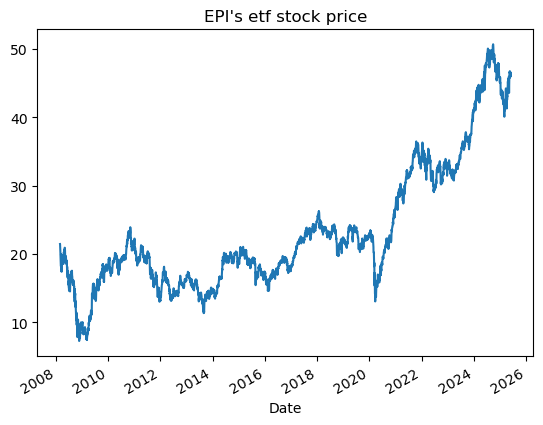

In [23]:
# About yFinance: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

epi_etf_daily['Close'].plot(title="EPI's etf stock price")

In [24]:
# get actions, incl. dividends - as a dataFrame
epi = yf.Ticker('EPI')
epi.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0
2010-06-28 00:00:00-04:00,0.065,0.0,0.0
2010-09-20 00:00:00-04:00,0.065,0.0,0.0
2010-12-22 00:00:00-05:00,0.013,0.0,0.0
2011-06-22 00:00:00-04:00,0.062,0.0,0.0


In [25]:
# get dividends as Series
epi.get_dividends()

Date
2008-12-22 00:00:00-05:00    0.091
2009-03-23 00:00:00-04:00    0.007
2009-06-22 00:00:00-04:00    0.002
2009-09-21 00:00:00-04:00    0.045
2009-12-21 00:00:00-05:00    0.006
2010-06-28 00:00:00-04:00    0.065
2010-09-20 00:00:00-04:00    0.065
2010-12-22 00:00:00-05:00    0.013
2011-06-22 00:00:00-04:00    0.062
2011-09-26 00:00:00-04:00    0.098
2012-03-26 00:00:00-04:00    0.010
2012-06-25 00:00:00-04:00    0.045
2012-09-24 00:00:00-04:00    0.083
2012-12-24 00:00:00-05:00    0.024
2013-06-24 00:00:00-04:00    0.068
2013-09-23 00:00:00-04:00    0.063
2014-03-24 00:00:00-04:00    0.099
2014-06-23 00:00:00-04:00    0.059
2014-09-22 00:00:00-04:00    0.068
2015-03-23 00:00:00-04:00    0.031
2015-06-22 00:00:00-04:00    0.067
2015-09-21 00:00:00-04:00    0.116
2015-12-21 00:00:00-05:00    0.024
2016-03-21 00:00:00-04:00    0.010
2016-06-20 00:00:00-04:00    0.125
2016-09-26 00:00:00-04:00    0.070
2016-12-23 00:00:00-05:00    0.006
2017-03-27 00:00:00-04:00    0.075
2017-06-26 00:0

In [26]:
# India's stock example
# https://www.nseindia.com/market-data/live-equity-market
EICHERMOT = yf.download(tickers = "EICHERMOT.NS",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [27]:
EICHERMOT

Price,Close,High,Low,Open,Volume
Ticker,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS
Date,,,,,
1996-01-01,1.072423,1.072423,1.072423,1.072423,22000
1996-01-02,1.075402,1.084339,1.072423,1.072423,31000
1996-01-03,1.087317,1.087317,1.087317,1.087317,11000
1996-01-04,1.087317,1.087317,1.072423,1.072423,16000
1996-01-05,1.072423,1.087318,1.054549,1.087318,6000
...,...,...,...,...,...
2025-05-28,5326.500000,5409.500000,5314.000000,5405.000000,380066
2025-05-29,5379.000000,5396.500000,5287.000000,5328.500000,704795


## 2.3 Paid data - Poligon.io (news endpoint) and Alpha Vantage

In [ ]:
# [Polygon.io] Please read the article (section "Polygon.io News API"): https://pythoninvest.com/long-read/chatgpt-api-for-financial-news-summarization
# Endpoint: https://polygon.io/docs/stocks/get_v2_reference_news

In [ ]:
# [Alpha Vantage] Please read the article (section "Data Sources"): https://pythoninvest.com/long-read/stock-screening-using-paid-data
# Endpoint: https://www.alphavantage.co/documentation/#fundamentals

## 2.4 Macroeconomics

* some indicator examples: gold reserves vs. volatility

In [28]:
# Gold reserves excl. gold for China
# https://fred.stlouisfed.org/series/TRESEGCNM052N

In [29]:
gold_reserves = pdr.DataReader("TRESEGCNM052N", "fred", start=start)

<Axes: xlabel='DATE'>

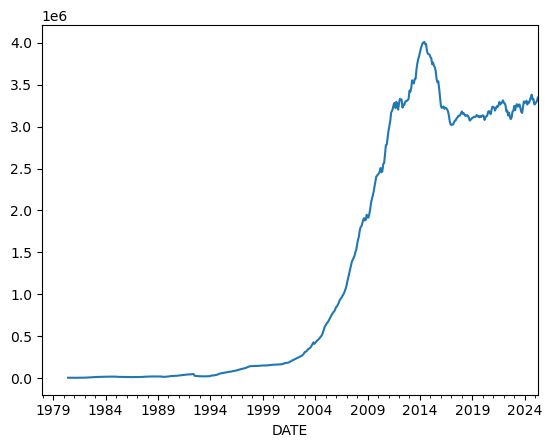

In [30]:
gold_reserves.TRESEGCNM052N.plot.line()

In [31]:
#  CBOE Gold ETF Volatility Index (GVZCLS)
# https://fred.stlouisfed.org/series/GVZCLS
gold_volatility = pdr.DataReader("GVZCLS", "fred", start=start)

<Axes: xlabel='DATE'>

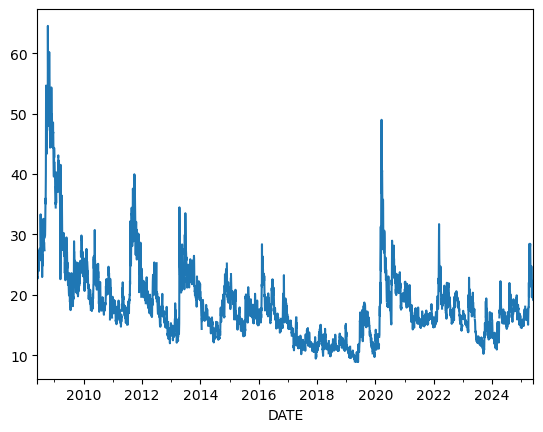

In [32]:
gold_volatility.GVZCLS.plot.line()

In [33]:
#  Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# https://fred.stlouisfed.org/series/DCOILWTICO
oil_wti = pdr.DataReader("DCOILWTICO", "fred", start=start)

<Axes: xlabel='DATE'>

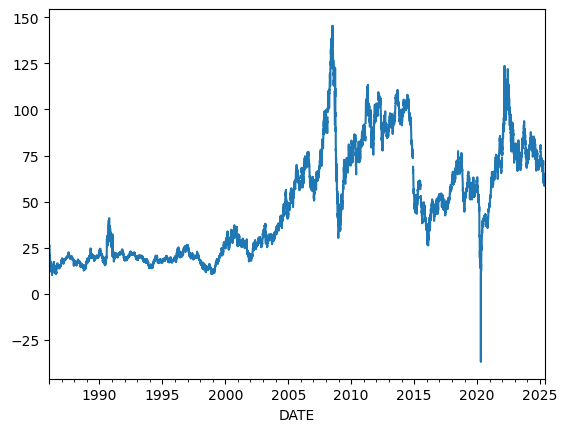

In [34]:
# there is a bug in the data? negative price?
oil_wti.DCOILWTICO.plot.line()

In [35]:
# Crude Oil Prices: Brent - Europe (DCOILBRENTEU)
# https://fred.stlouisfed.org/series/DCOILBRENTEU
oil_brent = pdr.DataReader("DCOILBRENTEU", "fred", start=start)

<Axes: xlabel='DATE'>

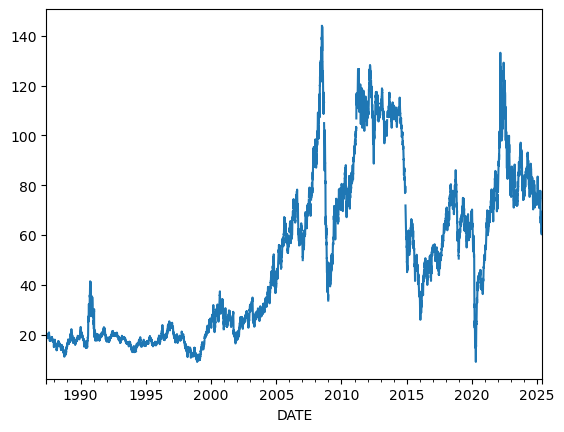

In [36]:
oil_brent.DCOILBRENTEU.plot.line()

In [37]:
# Web Scraping for Macro
# can't call directly via pd.read_html() as it returns 403 (forbidden) --> need to do a bit of work, but still no Selenium
# https://tradingeconomics.com/united-states/indicators
import requests
from bs4 import BeautifulSoup


url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [38]:

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

                  Unnamed: 0     Last  Previous  Highest    Lowest  \
0                   Currency    99.29     99.23   165.00     70.70   
1               Stock Market  5968.00   5970.00  6153.00      4.40   
2            GDP Growth Rate    -0.20      2.40    35.20    -28.10   
3     GDP Annual Growth Rate     2.10      2.50    13.40     -7.50   
4          Unemployment Rate     4.20      4.20    14.90      2.50   
5          Non Farm Payrolls   177.00    185.00  4631.00 -20471.00   
6             Inflation Rate     2.30      2.40    23.70    -15.80   
7         Inflation Rate MoM     0.20     -0.10     2.00     -1.80   
8              Interest Rate     4.50      4.50    20.00      0.25   
9           Balance of Trade  -140.00   -123.00     1.95   -140.00   
10           Current Account  -304.00   -310.00     9.96   -310.00   
11    Current Account to GDP    -3.90     -3.30     0.20     -6.00   
12    Government Debt to GDP   124.00    122.00   126.00     31.80   
13         Governmen

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_5372\51921383.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list


In [39]:
df

,Unnamed: 0,Last,Previous,Highest,Lowest,Unnamed: 5,Unnamed: 6
0,Currency,99.29,99.23,165.00,70.70,NaN,Jun/25
1,Stock Market,5968.00,5970.00,6153.00,4.40,points,Jun/25
2,GDP Growth Rate,-0.20,2.40,35.20,-28.10,percent,Mar/25
3,GDP Annual Growth Rate,2.10,2.50,13.40,-7.50,percent,Mar/25
4,Unemployment Rate,4.20,4.20,14.90,2.50,percent,Apr/25
5,Non Farm Payrolls,177.00,185.00,4631.00,-20471.00,Thousand,Apr/25
6,Inflation Rate,2.30,2.40,23.70,-15.80,percent,Apr/25
7,Inflation Rate MoM,0.20,-0.10,2.00,-1.80,percent,Apr/25
8,Interest Rate,4.50,4.50,20.00,0.25,percent,May/25
9,Balance of Trade,-140.00,-123.00,1.95,-140.00,USD Billion,Mar/25


## 2.5) Financial reporting - EDGAR (in Yahoo)

In [40]:
# let's check for NVDA
nvda =  yf.Ticker('NVDA')

In [41]:
# yearly financials for the last 4 years
nvda.financials


,2025-01-31,2024-01-31,2023-01-31,2022-01-31
Tax Effect Of Unusual Items,0.0,0.0,-284130000.0,0.0
Tax Rate For Calcs,0.133,0.12,0.21,0.019
Normalized EBITDA,86137000000.0,35583000000.0,7339000000.0,11351000000.0
Total Unusual Items,0.0,0.0,-1353000000.0,0.0
Total Unusual Items Excluding Goodwill,0.0,0.0,-1353000000.0,0.0
Net Income From Continuing Operation Net Minority Interest,72880000000.0,29760000000.0,4368000000.0,9752000000.0
Reconciled Depreciation,1864000000.0,1508000000.0,1543000000.0,1174000000.0
Reconciled Cost Of Revenue,32639000000.0,16621000000.0,11618000000.0,9439000000.0
EBITDA,86137000000.0,35583000000.0,5986000000.0,11351000000.0
EBIT,84273000000.0,34075000000.0,4443000000.0,10177000000.0


In [42]:
# balance sheet
nvda.balance_sheet

,2025-01-31,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,NaN,13800000000.0
Ordinary Shares Number,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Share Issued,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Net Debt,NaN,2429000000.0,7564000000.0,8956000000.0,6116000000.0
Total Debt,10270000000.0,11056000000.0,12031000000.0,11831000000.0,NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,NaN,-21000000.0
Gross Accounts Receivable,NaN,NaN,NaN,NaN,2450000000.0
Cash Cash Equivalents And Short Term Investments,43210000000.0,25984000000.0,13296000000.0,21208000000.0,NaN
Other Short Term Investments,34621000000.0,18704000000.0,9907000000.0,19218000000.0,NaN


In [43]:
# Basic info:
nvda.basic_info

C:\Users\ASUS TUF\.conda\envs\stock_market_notebook\lib\site-packages\yfinance\base.py:307: DeprecationWarning: 'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'
  warnings.warn("'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'", DeprecationWarning)


lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [44]:
# marketCap is quite useful, but don't know when it was updated? Daily?
nvda.basic_info['marketCap']/1e9

3547.4886565741876

In [45]:
# read this article for full info: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

## 2.6 Web Scraping - company info for clustering

In [49]:
# ask chatGPT: emulate clicking the link and downloading the content
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://companiesmarketcap.com/"

# Define headers with a user-agent to mimic a web browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})

    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/'+download_link["href"]

        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)

        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")

CSV file downloaded successfully.


In [50]:
global_stocks = pd.read_csv("./global_stocks.csv")

In [51]:
global_stocks['marketcap_b_usd'] = global_stocks.marketcap/1e9

In [52]:
global_stocks.head(10)

,Rank,Name,Symbol,marketcap,price (USD),country,marketcap_b_usd
0,1,NVIDIA,NVDA,3444016939008,141.22000,United States,3444.016939
1,2,Microsoft,MSFT,3441043177472,462.97000,United States,3441.043177
2,3,Apple,AAPL,3036000026624,203.27000,United States,3036.000027
3,4,Amazon,AMZN,2183899643904,205.71000,United States,2183.899644
4,5,Alphabet (Google),GOOG,2024896987136,167.71000,United States,2024.896987
5,6,Meta Platforms (Facebook),META,1676681019392,666.85000,United States,1676.681019
6,7,Saudi Aramco,2222.SR,1612108716728,6.61761,Saudi Arabia,1612.108717
7,8,Broadcom,AVGO,1207695835136,256.85000,United States,1207.695835
8,9,Tesla,TSLA,1108879867904,344.27000,United States,1108.879868
9,10,Berkshire Hathaway,BRK-B,1073689919488,497.83000,United States,1073.689919


In [53]:
global_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             10353 non-null  int64  
 1   Name             10353 non-null  object 
 2   Symbol           10352 non-null  object 
 3   marketcap        10353 non-null  int64  
 4   price (USD)      10353 non-null  float64
 5   country          10353 non-null  object 
 6   marketcap_b_usd  10353 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 566.3+ KB
